# Load

In [63]:
import pandas as pd

df1 = pd.read_csv('../data/raw/goemotions_1.csv')
df2 = pd.read_csv('../data/raw/goemotions_2.csv')
df3 = pd.read_csv('../data/raw/goemotions_3.csv')

df = pd.concat([df1, df2, df3])

In [64]:
df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


# Statistics

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211225 entries, 0 to 71224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  confus

In [66]:
df.isna().sum().any()

False

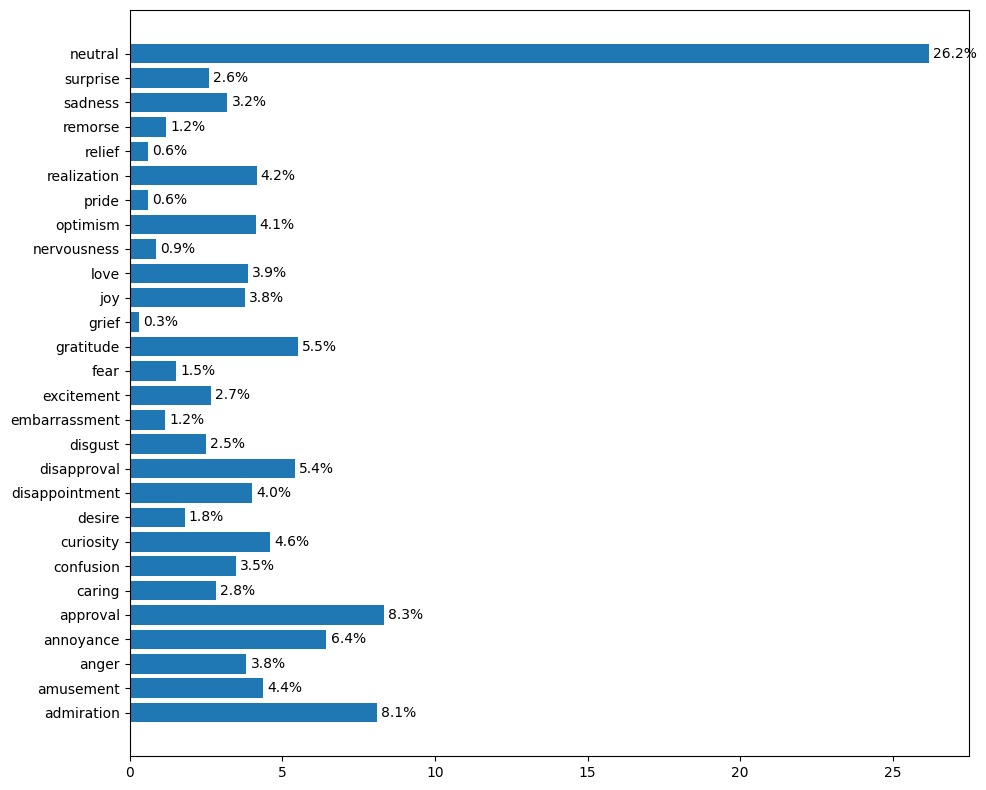

In [67]:
import matplotlib.pyplot as plt

filtered = df.drop(columns=['rater_id']).select_dtypes(int)
freqs = (filtered.sum() / df.shape[0] * 100).to_list()
fields = filtered.columns

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(fields, freqs)

ax.bar_label(bars, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


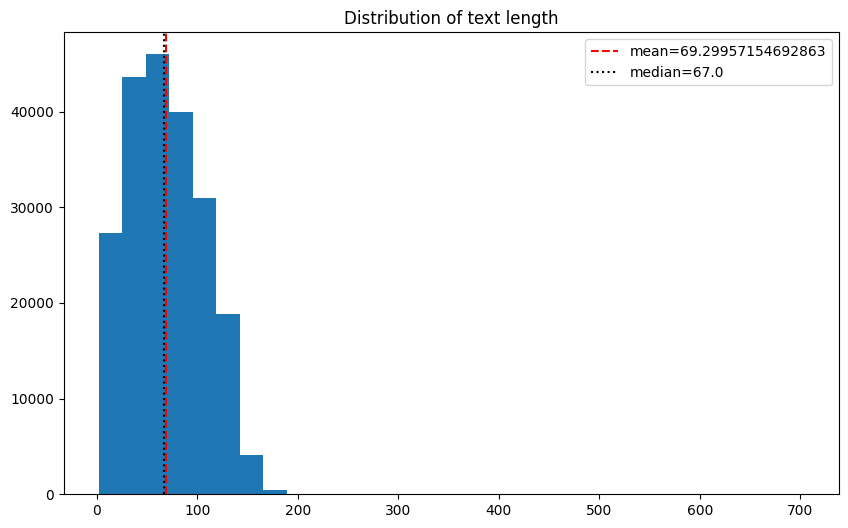

In [68]:
text_len = df.text.map(len)

plt.figure(figsize=(10, 6))
plt.hist(text_len, bins=30)

plt.axvline(text_len.mean(), color='red', linestyle='--', label=f'mean={text_len.mean()}')
plt.axvline(text_len.median(), color='black', linestyle=':', label=f'median={text_len.median()}')

plt.title("Distribution of text length")
plt.legend()

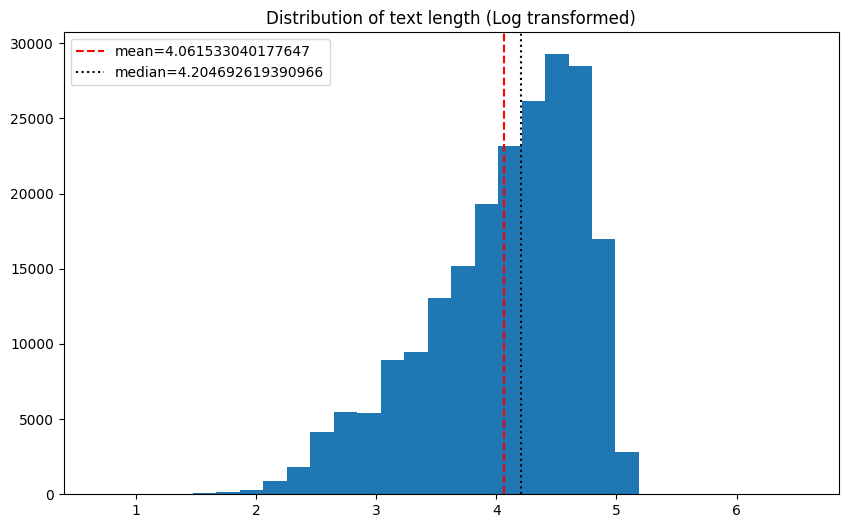

In [69]:
import math

text_len_transformed = df.text.map(lambda x: math.log(len(x)))

plt.figure(figsize=(10, 6))
plt.hist(text_len_transformed, bins=30)

plt.axvline(text_len_transformed.mean(), color='red', linestyle='--', label=f'mean={text_len_transformed.mean()}')
plt.axvline(text_len_transformed.median(), color='black', linestyle=':', label=f'median={text_len_transformed.median()}')

plt.title("Distribution of text length (Log transformed)")
plt.legend()

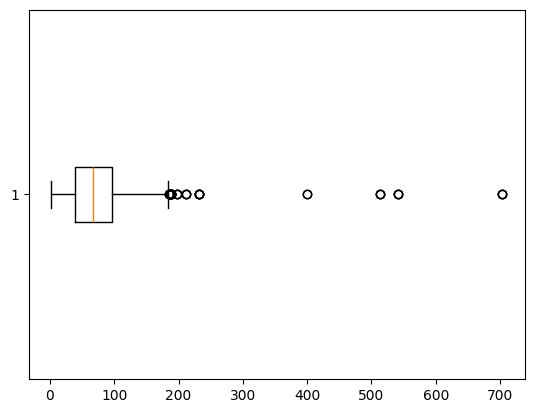

In [70]:
plt.boxplot(text_len, vert=False)
plt.show()

In [71]:
df.example_very_unclear.value_counts()

example_very_unclear
False    207814
True       3411
Name: count, dtype: int64

In [72]:
df_unclear = df[df['example_very_unclear'] == True]

df_unclear.sample(10, random_state=42).text.to_list()

['That\'s a *really* weak counter-argument. "They didn\'t achieve *total* world domination, so it\'s still a free market."',
 'Troo, troo....worse eban dan eat pizza wif aht a ferk. ',
 "No offense but...she's not pretty either so I'm confused why she'd say that car is only for ugly women.",
 ">i don't feel so good (mister [NAME]). r/unexpectedspiderman",
 ':((',
 'She has to learn to Let It Go.',
 'I mean, to be fair... She did say sorry. /s',
 "Umm... Dude. Have you seen this planet? It's half penis-monsters already!",
 '*whines and cries in brogressive*',
 'Nelsinho!!']

In [73]:
from collections import Counter
import re

counter = Counter()
pattern = re.compile(r'\[[A-Z_]+\]')

for t in df['text'].dropna():
    counter.update(pattern.findall(t))

counter


Counter({'[NAME]': 37150,
         '[RELIGION]': 498,
         '[T]': 5,
         '[ALL]': 3,
         '[TEAM]': 3})

In [74]:

def show_examples(pattern, n=5):
    print(f'\n=== Examples containing {pattern} ===')
    samples = df[df['text'].str.contains(pattern, regex=False, na=False)]
    
    if len(samples) == 0:
        print('No examples found.')
        return
    
    for i, text in enumerate(samples.sample(min(n, len(samples)), random_state=42)['text'], 1):
        print(f'{i}. {text}')

for p in counter.keys():
    show_examples(p, n=5)



=== Examples containing [NAME] ===
1. [NAME] knocking [NAME] out. Somehow, I didn't expect the brainwashed soldier to betray the kids.
2. Absolutely gorgeous pass by [NAME]
3. No... There are many ways to prove you are [NAME]. I've heard of people that proved they are [NAME] by showing that their mother speaks Yidish.
4. Before the trade happened I knew [NAME] was [NAME] but [NAME] beauty had not reached me yet
5. [NAME], we told you to PLEASE be sober when you come to work!

=== Examples containing [RELIGION] ===
1. [NAME] hated religions, [NAME] was [RELIGION].
2. I pose you this question, "How do you know [RELIGION] is not the right religion?"
3. Lol nope. She helped me alot through it. I'd say [RELIGION]/parents made me miserable
4. Blame [RELIGION] communities where it's normalised for men to divorce women without giving her any of her rights , even Islamically. 
5. Oh really. Go ahead and try to reason with an [RELIGION] government that their power should be limited. Good luck.


NER Inference:
- NAME, RELIGION: Importance
- T: Noise
- ALL, TEAM: Speaker

In [75]:
emoji_pattern = re.compile(
    "["
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map
    "\U0001F900-\U0001F9FF"  # supplemental symbols
    "\U0001FA00-\U0001FAFF"  # extended
    "]",
    flags=re.UNICODE
)

emojis = Counter()

for t in df['text'].dropna():
    emojis.update(emoji_pattern.findall(t))

emojis

Counter({'😂': 1282,
         '🤣': 344,
         '😤': 278,
         '😭': 239,
         '👏': 194,
         '🤔': 167,
         '🏻': 139,
         '👍': 135,
         '😍': 126,
         '😊': 113,
         '🤷': 109,
         '😅': 106,
         '🏼': 104,
         '🙄': 101,
         '😎': 98,
         '🦀': 93,
         '👌': 92,
         '😢': 90,
         '🔥': 80,
         '🙏': 77,
         '😉': 76,
         '💯': 70,
         '😁': 64,
         '💜': 63,
         '🎶': 55,
         '😔': 55,
         '🤢': 52,
         '😡': 51,
         '🙌': 49,
         '😩': 48,
         '👀': 47,
         '🙃': 44,
         '💕': 42,
         '💦': 42,
         '🤦': 41,
         '😆': 39,
         '😐': 38,
         '😏': 38,
         '😘': 36,
         '😥': 35,
         '🤗': 35,
         '😄': 32,
         '😬': 31,
         '🏽': 30,
         '🤮': 30,
         '💪': 30,
         '🌈': 29,
         '😱': 27,
         '😳': 26,
         '🎵': 24,
         '🎉': 24,
         '😀': 24,
         '💃': 23,
         '😒': 21,
         '🎂':

In [76]:
df['text'].value_counts()


text
Thank you.                                                                                                                 45
Thank you!                                                                                                                 35
Happy cake day!                                                                                                            29
Weird flex but ok                                                                                                          25
[NAME]                                                                                                                     22
                                                                                                                           ..
And yet a complete lack of interest in the water usage of factory beef farms.                                               1
Exactly this for me. I straight don't care and it costs me nothing so...                                         

In [80]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

label_cols = df.drop(columns=['rater_id']).select_dtypes(int).columns

df_dup = df[df.text.duplicated(keep=False)].copy()
groups = df_dup.groupby('text')

def mean_cosine(group):
    X = group[label_cols].values
    if len(X) < 2:
        return 1.0
    cos = cosine_similarity(X)
    idx = np.triu_indices_from(cos, k=1)
    return cos[idx].mean()

def mean_cosine_to_centroid(group):
    X = group[label_cols].values
    centroid = X.mean(axis=0, keepdims=True)
    return cosine_similarity(X, centroid).mean()

mean_cosine_score = groups.apply(mean_cosine)
centroid_cosine = groups.apply(mean_cosine_to_centroid)

summary = pd.DataFrame({
    'n_samples': groups.size(),
    'mean_cosine_pairwise': mean_cosine_score,
    'mean_cosine_centroid': centroid_cosine
}).sort_values('mean_cosine_pairwise')

C:\Users\PC\AppData\Local\Temp\ipykernel_1452\3360511384.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mean_cosine_score = groups.apply(mean_cosine)
C:\Users\PC\AppData\Local\Temp\ipykernel_1452\3360511384.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centroid_cosine = groups.apply(mean_cosine_to_centroid)


In [81]:
summary

,n_samples,mean_cosine_pairwise,mean_cosine_centroid
text,,,
🧀 <——The best gold for you! 🙌,3,0.0,0.333333
Call your legislator and complain. Ill-mannered public servants tend to fear politicians more than they do lawyers.,5,0.0,0.346410
She barely has any real hair on her head. She looks like [NAME] dolly from Rugrats. Bet,5,0.0,0.442069
She can be crazy fo sho,5,0.0,0.447214
"Call me cynical, but I wish things wouldn't go back. That's why I like Infinity Wars as much as I did.",5,0.0,0.440588
...,...,...,...
"I took him at the start of the season when he was recording some assists, stopped playing after a while :p",3,1.0,1.000000
I would have thought so yeah.,3,1.0,1.000000
How’d you film this and what type of microscope/camera did you use? This is great!! Thank you for creating and sharing.,3,1.0,1.000000


In [ ]:
summary.describe()

,n_samples,mean_cosine_pairwise,mean_cosine_centroid
count,57663.000000,57663.000000,57663.000000
mean,3.661898,0.389458,0.724400
std,1.017010,0.301731,0.160998
min,2.000000,0.000000,0.000000
25%,3.000000,0.192450,0.606086
50%,3.000000,0.333333,0.745356
75%,5.000000,0.438832,0.772194
max,45.000000,1.000000,1.000000


In [82]:
low_cos_texts = mean_cosine_score[mean_cosine_score < 0.7].index

json_logs = []

for text in low_cos_texts:
    group = groups.get_group(text)

    samples = []
    for idx, row in group.iterrows():
        label_vector = row[label_cols].astype(int).tolist()

        samples.append({
            "row_id": int(idx),
            "labels": str(label_vector)
        })

    json_logs.append({
        "text": text,
        "mean_cosine": mean_cosine_score[text],
        "n_samples": len(group),
        "samples": samples
    })

In [ ]:
import json

with open("../data/log/ambiguous_duplicates.json", "w", encoding="utf-8") as f:
    json.dump(
        json_logs,
        f,
        ensure_ascii=False,
        indent=2,
    )

In [83]:
step = 10000
for i in range(0, len(json_logs), step):
    with open(f"../data/log/ambiguous_duplicates_offset_{i}.json", "w", encoding="utf-8") as f:
        json.dump(
            json_logs[:i+step],
            f,
            ensure_ascii=False,
            indent=2,
        )

In [ ]:
len(json_logs)

46250

In [ ]:
df["is_all_zero"] = df[label_cols].sum(axis=1) == 0
df_all_zero = df[df.is_all_zero]

df_all_zero.shape[0] / df.shape[0], df_all_zero.shape[0]

(0.016148656645756893, 3411)

In [ ]:
df_all_zero.example_very_unclear.all()

True

In [78]:
label_cols

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')